## Importing the Libraries

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
sb.set()

## Preprocessing

### Loading the Data

In [3]:
data=pd.read_csv('C:\\Users\gagan\Desktop\csv files\Real_life_example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining variables of interest

In [10]:
data1=data.drop('Model',axis=1)
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [13]:
data1.isnull().sum() # gives us the information of all the missing values and gives the total missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

- IF YOU ARE REMOVING **<5%** OF THE OBSERVATIONS,WE ARE FREE TO JUST REMOVE ALL THAT HAVE MISSING VALUES

In [15]:
data_no_mv= data1.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Explore the PDFs

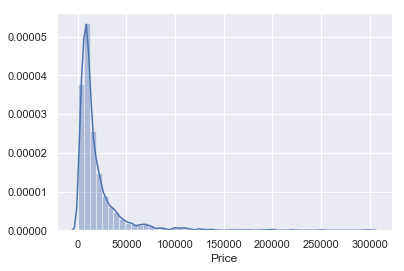

In [17]:
sb.distplot(data_no_mv['Price']) # For optimal Results we would be looking for Normal Distribution

**Outliers = Observations that lie on abnormal distance from other observations in the data**

### Dealing with Outliers

In [115]:
q=data_no_mv['Price'].quantile(0.90)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622,3622.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,850,NaN,1444,NaN,NaN,1608,3251,NaN
mean,NaN,12951.076521,NaN,177.020983,2.688192,NaN,NaN,2005.546107
std,NaN,9028.269200,NaN,97.240484,5.183080,NaN,NaN,6.507230
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6500.000000,NaN,110.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10400.000000,NaN,170.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17500.000000,NaN,240.000000,2.800000,NaN,NaN,2011.000000


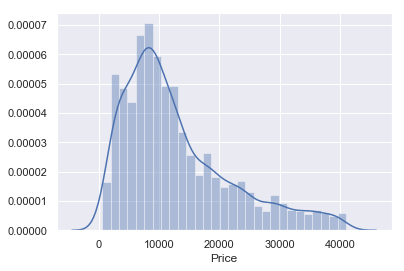

In [116]:
sb.distplot(data_1['Price'])

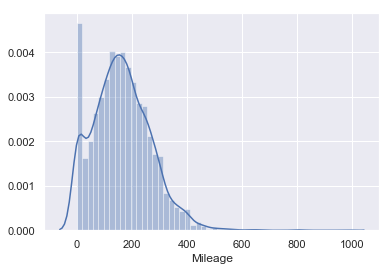

In [117]:
sb.distplot(data_no_mv['Mileage'])

In [118]:
q=data_1['Mileage'].quantile(0.90)
data_2=data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3229,3229.000000,3229,3229.000000,3229.000000,3229,3229,3229.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,766,NaN,1226,NaN,NaN,1408,2928,NaN
mean,NaN,13829.458365,NaN,154.971818,2.655088,NaN,NaN,2006.567668
std,NaN,9108.664930,NaN,75.017525,4.910637,NaN,NaN,5.855246
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7400.000000,NaN,102.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11300.000000,NaN,158.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,18500.000000,NaN,212.000000,2.800000,NaN,NaN,2011.000000


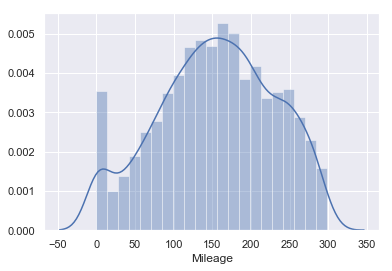

In [119]:
sb.distplot(data_2['Mileage'])

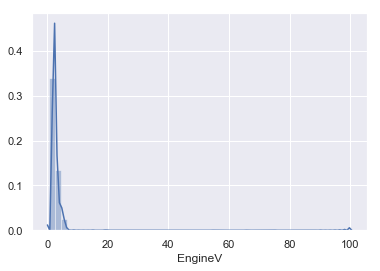

In [120]:
sb.distplot(data_no_mv['EngineV'])

In [121]:
data_3= data_2[data_2['EngineV']<6.5]

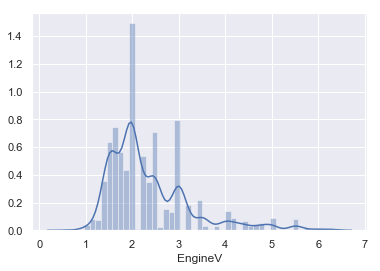

In [122]:
sb.distplot(data_3['EngineV'])

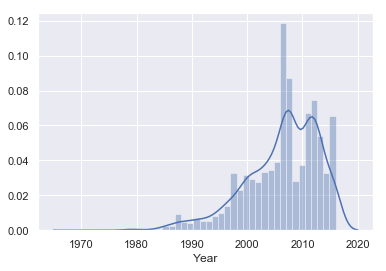

In [123]:
sb.distplot(data_no_mv['Year'])

In [124]:
#sb.heatmap(data.corr())

In [125]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3169,3169.000000,3169,3169.000000,3169.000000,3169,3169,3169.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,751,NaN,1195,NaN,NaN,1394,2873,NaN
mean,NaN,13991.225374,NaN,154.641527,2.353465,NaN,NaN,2006.859262
std,NaN,9068.185586,NaN,74.760313,0.903599,NaN,NaN,5.314694
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7500.000000,NaN,102.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11500.000000,NaN,157.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,18700.000000,NaN,210.000000,2.700000,NaN,NaN,2011.000000


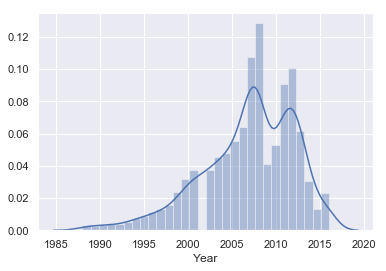

In [126]:
sb.distplot(data_4['Year'])

In [127]:
data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3169,3169.000000,3169,3169.000000,3169.000000,3169,3169,3169.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,751,NaN,1195,NaN,NaN,1394,2873,NaN
mean,NaN,13991.225374,NaN,154.641527,2.353465,NaN,NaN,2006.859262
std,NaN,9068.185586,NaN,74.760313,0.903599,NaN,NaN,5.314694
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7500.000000,NaN,102.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11500.000000,NaN,157.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,18700.000000,NaN,210.000000,2.700000,NaN,NaN,2011.000000


## Checking the OLS Assumptions

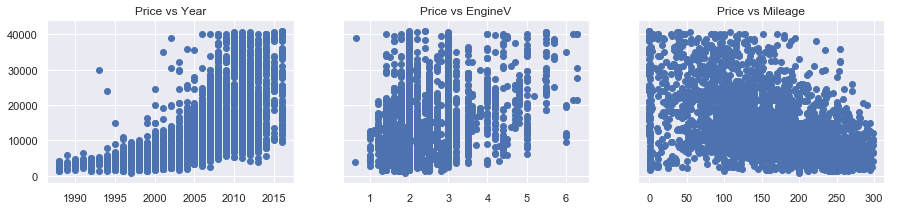

In [162]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price vs Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price vs Mileage')
plt.show()



### Relaxing the assumptions

In [163]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
5,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
6,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
7,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046
8,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,9.159047
9,Volkswagen,10500.0,sedan,100,1.80,Petrol,yes,2008,9.259131


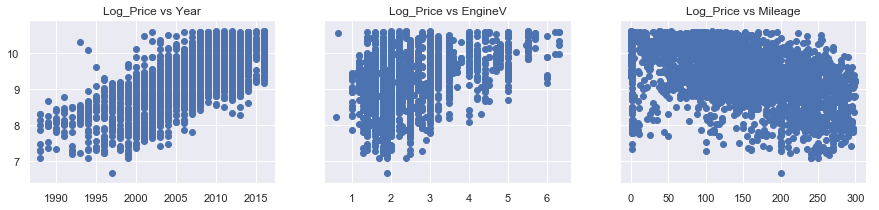

In [164]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log_Price vs Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log_Price vs EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log_Price vs Mileage')
plt.show()


In [165]:
#data_cleaned=data_cleaned.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209


### MultiCollinearity

In [166]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [168]:
vif

,VIF,features
0,5.352512,Mileage
1,10.703629,Year
2,7.926294,EngineV


In [169]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,9.287209


### Create dummy variables for categorical values

In [170]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [171]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,14200.0,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10799.0,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Rearrange

In [172]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [173]:
cols=['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [174]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear Regression Model

### Declare the inputs and targets

In [175]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop('log_price',axis=1)

### Scale the data

In [176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [177]:
scaled_inputs=scaler.transform(inputs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Train Test Split

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2,random_state=360)

### Create the Regression

In [179]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
y_hat=reg.predict(x_train)

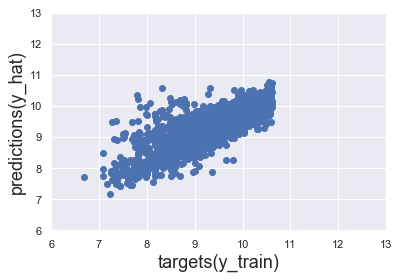

In [181]:
plt.scatter(y_train,y_hat)
plt.xlabel('targets(y_train)',size=18)
plt.ylabel('predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

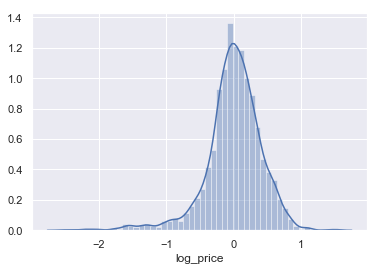

In [182]:
sb.distplot(y_train-y_hat)

In [183]:
reg.score(x_train,y_train)

0.6476801622123147

### Finding the Weights and Bias

In [184]:
reg.intercept_

9.326930553994242

In [185]:
reg.coef_

array([-0.2739479 ,  0.16055532, -0.00314325, -0.01782336, -0.13060664,
       -0.16940091, -0.03714669, -0.07951071, -0.15805536, -0.09407475,
       -0.18936486, -0.1225747 , -0.18709421, -0.1112585 , -0.02396573,
       -0.11823022,  0.32995606])

In [186]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary['Bias']=reg.intercept_
reg_summary

,Features,Weights,Bias
0,Mileage,-0.273948,9.326931
1,EngineV,0.160555,9.326931
2,Brand_BMW,-0.003143,9.326931
3,Brand_Mercedes-Benz,-0.017823,9.326931
4,Brand_Mitsubishi,-0.130607,9.326931
5,Brand_Renault,-0.169401,9.326931
6,Brand_Toyota,-0.037147,9.326931
7,Brand_Volkswagen,-0.079511,9.326931
8,Body_hatch,-0.158055,9.326931
9,Body_other,-0.094075,9.326931


In [187]:
data_cleaned['Brand'].unique()

array(['BMW', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

### Testing

In [188]:
y_hat_test=reg.predict(x_test)


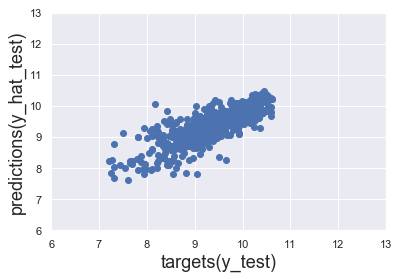

In [189]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('targets(y_test)',size=18)
plt.ylabel('predictions(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [190]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,16193.398050
1,9732.777539
2,10356.816154
3,4502.782453
4,14683.382745


In [191]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0     9.539644
1     9.082507
2     9.417355
3     8.242756
4    10.341742
Name: log_price, dtype: float64

In [192]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,16193.398050,13900.0
1,9732.777539,8800.0
2,10356.816154,12300.0
3,4502.782453,3800.0
4,14683.382745,31000.0


In [193]:
df_pf['Residuals']=df_pf['Target']-df_pf['Predictions']

In [194]:
df_pf['difference%']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [195]:
df_pf.head()

,Predictions,Target,Residuals,difference%
0,16193.398050,13900.0,-2293.398050,16.499267
1,9732.777539,8800.0,-932.777539,10.599745
2,10356.816154,12300.0,1943.183846,15.798243
3,4502.782453,3800.0,-702.782453,18.494275
4,14683.382745,31000.0,16316.617255,52.634249


In [159]:
df_pf.describe()

,Predictions,Target,Residuals,difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [202]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_hat_test))

0.4185242198213888